In [6]:
# from fastai import *
from fastai.vision import *

In [8]:
print(Path('walking.txt').exists())
download_images('walking.txt','walking')

True


Error https://www.active.com/Assets/Running/460/Walking-to-Improve-Running.jpg HTTPSConnectionPool(host='www.active.com', port=443): Read timed out. (read timeout=4)
Error https://www.active.com/Assets/4-Ways-Walking-Can-Help-You-Run-Faster.jpg HTTPSConnectionPool(host='www.active.com', port=443): Read timed out. (read timeout=4)
Error https://www.active.com/Assets/Walking/Build+Your+Core+with+Chi+Walking+460x345.jpg HTTPSConnectionPool(host='www.active.com', port=443): Read timed out. (read timeout=4)


In [9]:
verify_images('walking', delete=True, max_size=500)

Image walking/00000012.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='walking/00000045.jpg'>
cannot identify image file <_io.BufferedReader name='walking/00000000.jpg'>
Image walking/00000096.png has 4 instead of 3 channels


In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder('walking', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

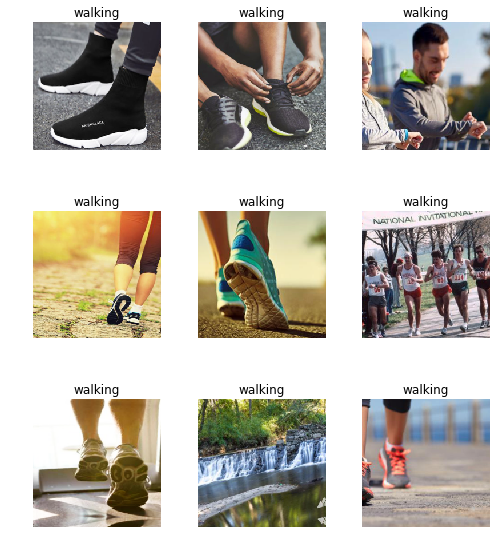

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
coco = untar_data(URLs.COCO_TINY)

In [20]:
coco = untar_data(URLs.COCO_TINY)
images, lbl_bbox = get_annotations(coco/'train.json')
img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:img2bbox[o.name]

In [22]:
data = (ObjectItemList.from_folder(coco)
        #Where are the images? -> in coco
        .random_split_by_pct()                          
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func
        .transform(get_transforms(size = size), tfm_y=True)
        #Data augmentation? -> Standard transforms with tfm_y=True
        .databunch(bs=16, collate_fn=bb_pad_collate))   
        #Finally we convert to a DataBunch and we use bb_pad_collate
data

ImageDataBunch;

Train: LabelList
y: ObjectCategoryList (160 items)
[ImageBBox (128, 128), ImageBBox (128, 128), ImageBBox (128, 128), ImageBBox (128, 128), ImageBBox (128, 128)]...
Path: /home/tako/.fastai/data/coco_tiny
x: ObjectItemList (160 items)
[Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128)]...
Path: /home/tako/.fastai/data/coco_tiny;

Valid: LabelList
y: ObjectCategoryList (40 items)
[ImageBBox (128, 128), ImageBBox (128, 128), ImageBBox (128, 128), ImageBBox (128, 128), ImageBBox (128, 128)]...
Path: /home/tako/.fastai/data/coco_tiny
x: ObjectItemList (40 items)
[Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128)]...
Path: /home/tako/.fastai/data/coco_tiny;

Test: None